14.812975298818069
14.801179033397496
14.789416609566537
14.777687891560957
14.765992744303908
14.754331033401744
14.742702625139799
14.731107386478234
14.719545185047906
14.708015889146264
14.69651936773328
14.685055490427402
14.67362412750154
14.66222514987908
14.650858429129933
14.639523837466601
14.628221247740274
14.616950533436963
14.605711568673655
14.594504228194488
14.583328387366972
14.572183922178214
14.561070709231187
14.549988625741024
14.538937549531324
14.527917359030507
14.516927933268168
14.505969151871476
14.495040895061603
14.484143043650153
14.473275479035646
14.462438083199997
14.451630738705042
14.440853328689096
14.430105736863492
14.419387847509192
14.408699545473404
14.39804071616621
14.387411245557237
14.376811020172337
14.366239927090298
14.355697853939581
14.345184688895078
14.334700320674864
14.324244638537031
14.313817532276488
14.303418892221808
14.293048609232098
14.282706574693885
14.272392680518026
14.262106819136633
14.251848883500033
14.2416187670737

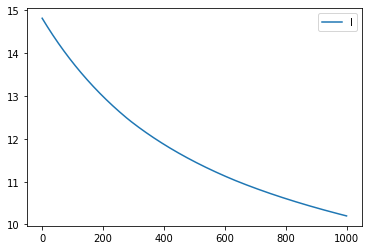

In [49]:
import numpy
i_nodes = 2
o_nodes = 2
h_nodes = 3
batch_size = 8

i_data = numpy.random.randn(batch_size,i_nodes)
o_data = numpy.random.randn(batch_size,o_nodes)
wl =  numpy.random.randn(i_nodes,h_nodes)
w2 = numpy.random.randn(h_nodes,o_nodes)

loss_array = numpy.array([[]])
indices = numpy.array([[]])
for i in range(1000):
    h_values = i_data.dot(wl)

    h_relu = numpy.maximum(h_values,0)
    o_data_predictions = h_relu.dot(w2)
    loss = (numpy.square(o_data_predictions - o_data).sum())
    loss_array = numpy.append(loss_array,loss)
    indices = numpy.append(indices,i)
    print(loss)
    grad_pred =  2 * (o_data_predictions - o_data)

    grad_w2 = h_relu.T.dot(grad_pred)

    grad_h_relu = grad_pred.dot(w2.T)
    grad_h_values = grad_h_relu.copy()
    grad_h_values[h_values <0 ] = 0
    grad_w1 = i_data.T.dot(grad_h_values)
   
    wl = wl -grad_w1* 1e-4
    w2 = w2- grad_w2* 1e-4

plt.plot(indices,loss_array)
plt.legend('lost over iterations')
plt.show()

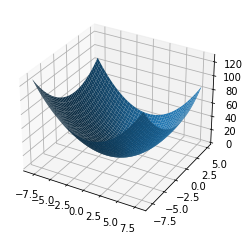

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
x = numpy.arange(-8,8,0.1)
y = numpy.arange(-8,5,0.1)
x,y = numpy.meshgrid(x,y)

z = x **2 + y **2

gradient =  [2*x + y ** 2 , x **2 + 2*y]
axes = plt.axes(projection='3d')
axes.plot_surface(x,y,z)